## Homework 1 - IEOR 242 - Data Analysis

### Exercice 3

In this problem, we are asked to predict the montly sales of Jeep Wrangler Automobile through linear regression. 

In [40]:
RMSE = function(m, o){
  sqrt(mean((m - o)^2))
}

In [41]:
data = read.csv('Wrangler242-Spring2019.csv')

In [42]:
summary(data)

  MonthNumeric     MonthFactor      Year      WranglerSales    Unemployment  
 Min.   : 1.00   April   : 9   Min.   :2010   Min.   : 4888   Min.   :3.700  
 1st Qu.: 3.75   August  : 9   1st Qu.:2012   1st Qu.:11305   1st Qu.:4.800  
 Median : 6.50   December: 9   Median :2014   Median :13653   Median :6.200  
 Mean   : 6.50   February: 9   Mean   :2014   Mean   :14117   Mean   :6.501  
 3rd Qu.: 9.25   January : 9   3rd Qu.:2016   3rd Qu.:16531   3rd Qu.:8.200  
 Max.   :12.00   July    : 9   Max.   :2018   Max.   :29776   Max.   :9.900  
                 (Other) :54                                                 
 WranglerQueries     CPI.All        CPI.Energy   
 Min.   : 30.00   Min.   :217.2   Min.   :177.2  
 1st Qu.: 46.00   1st Qu.:228.6   1st Qu.:205.4  
 Median : 60.50   Median :236.1   Median :220.5  
 Mean   : 61.63   Mean   :235.1   Mean   :222.9  
 3rd Qu.: 78.00   3rd Qu.:241.2   3rd Qu.:244.9  
 Max.   :100.00   Max.   :252.9   Max.   :256.0  
                          

#### 1. Define training set and test set

In [43]:
train = data[data$Year <= 2015,]
test = data[data$Year > 2015,]

In [44]:
summary(train$Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2010    2011    2012    2012    2014    2015 

In [45]:
summary(test$Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2016    2016    2017    2017    2018    2018 

#### 2. Choice of the features used in the model

 Let's start with a model using the four features: Unemployment, WranglerQueries, CPI.Energy, CPI.ALL

In [46]:
cor(data[,c("Unemployment","WranglerQueries","CPI.All","CPI.Energy")])

,Unemployment,WranglerQueries,CPI.All,CPI.Energy
Unemployment,1.0000000,-0.9210803,-0.9615037,0.5026316
WranglerQueries,-0.9210803,1.0000000,0.8886259,-0.5078886
CPI.All,-0.9615037,0.8886259,1.0000000,-0.2983637
CPI.Energy,0.5026316,-0.5078886,-0.2983637,1.0000000


From this simple analysis of the correlation between the four variables, we observe that Unemployment and WranglerQueries are strongly correlated, Unemployment and CPI.all also as well as WranglerQueries and CPI.All. Therefore, we can make the hypothesis that only one of those three features would be necessary in our model. 

#### Model1: All the variables

In [47]:
mod = lm(WranglerSales ~ Unemployment + WranglerQueries + CPI.All + CPI.Energy, data=train)

In [48]:
summary(mod)


Call:
lm(formula = WranglerSales ~ Unemployment + WranglerQueries + 
    CPI.All + CPI.Energy, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3453.6 -1178.0   -51.9   887.1  7628.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -51248.45   59358.29  -0.863    0.391    
Unemployment       989.12    1122.98   0.881    0.382    
WranglerQueries    274.55      34.25   8.015 2.26e-11 ***
CPI.All            192.02     253.11   0.759    0.451    
CPI.Energy          -8.64      31.65  -0.273    0.786    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1757 on 67 degrees of freedom
Multiple R-squared:  0.7961,	Adjusted R-squared:  0.7839 
F-statistic:  65.4 on 4 and 67 DF,  p-value: < 2.2e-16


In [49]:
car::vif(mod)

Unemployment WranglerQueries         CPI.All      CPI.Energy 
      68.852495        4.509533       69.700881        8.410345

Therefore, from the variance inflation factor analysis Unemployment and CPI.All should be removed and looking at t value, CPI.Energy also seems irrelevant.

In [50]:
pred0 = predict(mod, newdata=train)
RMSE(train$WranglerSales, pred0)

[1] 1694.443

##### Interpretation:

The t value is the estimate divided by the standard error.
The larger the absolute value of the t value, the more likely
the coefficient is to be significant.
Therefore, we want independent variables with a large absolute value
in this column.


The last column measure how plausible
it is that the coefficient is actually 0, given
the data we used to build the model.
This number will be large if the absolute value of the t value
is small, and it will be small if the absolute value of the t
value is large.
Therefore, we want independent variables with small values
in this column.



From this first model, one feature seems to be more relevant in the prediction of the Sales: WranglerQueries. This observation confirmes our hypothesis drawn from the correlations between variables. 

In [51]:
SSE = sum(mod$residuals^2)
SSE

[1] 206721761

##### Model2: only one feature: WranglerQueries

In [52]:
mod1 = lm(WranglerSales ~ WranglerQueries, data=train)

In [53]:
summary(mod1)


Call:
lm(formula = WranglerSales ~ WranglerQueries, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3301.1 -1038.8   161.2   885.2  7811.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -850.6      855.6  -0.994    0.324    
WranglerQueries    259.5       16.1  16.117   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1753 on 70 degrees of freedom
Multiple R-squared:  0.7877,	Adjusted R-squared:  0.7847 
F-statistic: 259.8 on 1 and 70 DF,  p-value: < 2.2e-16


##### Interpretation:

In this model, the all the variables are significant. The new adjusted R-squared is almost the same than in the previous model (0.1% better). Consequently, the addition of three more variable that decrease the adjusted R squared is irrelavant.

The R squred of 0.7 is not so bad, the model actually provide some insight toward the prediction of the Sales.

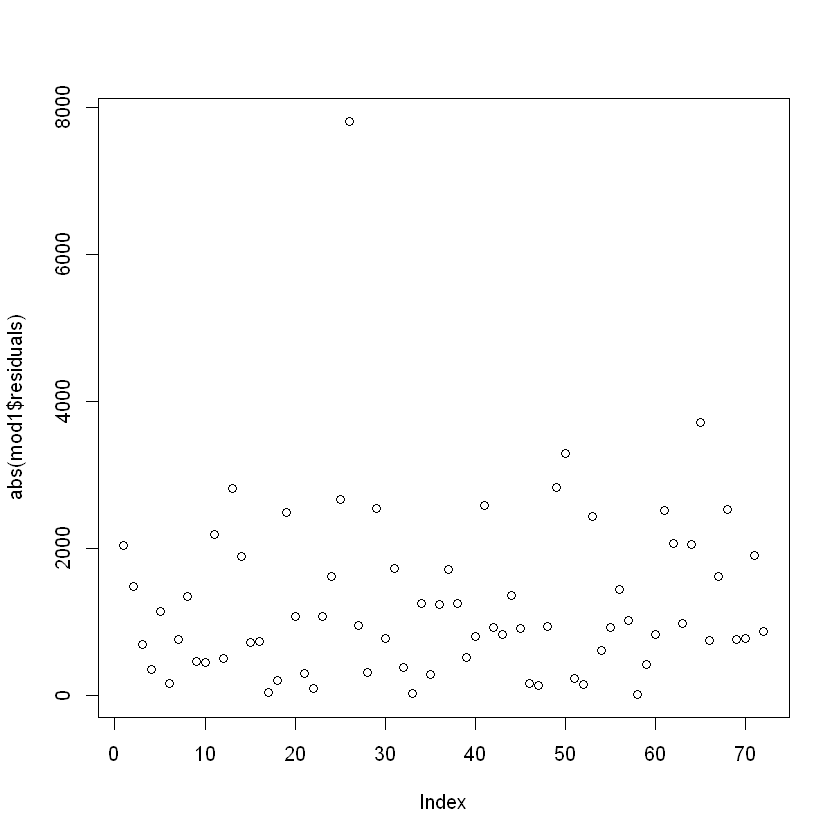

In [54]:
plot(abs(mod1$residuals))

In [55]:
SSE1 = sum(mod1$residuals^2)
SSE1

[1] 215220386

In [56]:
pred = predict(mod1, newdata=train)

In [57]:
RMSE(train$WranglerSales, pred)

[1] 1728.922

In [58]:
sd(train$WranglerSales)

[1] 3778.871

In [59]:
(SSE - SSE1)/SSE1

[1] -0.03948801

In [60]:
SST_train = sum((train$WranglerSales - mean(train$WranglerSales))^2)
SST

[1] 1013870573

In [61]:
1 - SSE1/SST_train

[1] 0.787724

The sum of squared error is only 4% bigger. As a result, we can conclude that the two features Unemployment and CPI.All were irrelevant or redondant in the previous model. 

### Responses to questions a)

#### 1. What is the linear regression equation produced by your model, and how should one interpret the coeﬃcients for the independent variables?

The linear regression equation of the final model is:

Sales = -9182.22 + 259.5 * (WranglerQueries)

First, there is a positive correlation between Sales and WranglerQueries. Therefore, when WranglerQueries increase of one unit, Sales increase, on average, by 259.5 units.

#### 2. How did you select the variables to include in your linear regression model? Does it make sense to remove any variables due to multicollinearity among the four independent variables?

As we have seen before, the three variables WranglerQueries, Unemployment and CPI.all are strongly correlated. Therefore, it suggests that some of them are not necessary. The VIF analysis, definitely removed Unemplyment and CPI.all from the equation (VIF way to big). With a VIF of about 8, CPI.Energy is still uncertain but probably not necessary. Then, analysing the model produced with the four features, we observed that WranglerQueries weights much more heavily than the tree other ones in the model, suggesting that a model with only WranglerQueries would be better. (with p-value analysis)

#### 3. Which of these variables are signiﬁcant?

According to the previous analysis the significant variable is WranglerQueries. It is enought to explain most of the Sales variations.

#### 4. Do the signs of the model’s coeﬃcients make sense? Are you reasonably sure that the signs are correct?


As Wanglers is a pretty expensive product, the sale does not start with the first queries nor as soon as the CPI is positive. To counter balance this necessary thresold, the intersection coefficient is negative. One the other hand, as the number of queries for Wrangler increase, a certain percentage will be converted into sale and therefore the company will make some money. Hence the posive sign of WranglerQueries in the regression model.

#### 5.  How well does the model predict training set observations? Can you justify the model’s performance on the training data with a quantiﬁable metric?

The R squared associated with the training set is 0.7847. This is better than the adjusted R squared of the model with four features, meaning that the three additional features does not improve the model more than it would be improved by chance. Therefore, this model is the simplest, more accurate and interpretable model to predict the Sales of the company. 



In [62]:
head(data)

MonthNumeric,MonthFactor,Year,WranglerSales,Unemployment,WranglerQueries,CPI.All,CPI.Energy
1,January,2010,4888,9.8,30,217.488,212.807
2,February,2010,5967,9.8,32,217.281,209.624
3,March,2010,8410,9.9,33,217.353,209.326
4,April,2010,8327,9.9,34,217.403,209.219
5,May,2010,9634,9.6,36,217.290,206.631
6,June,2010,8923,9.4,37,217.199,203.764


#### Model3: Adding MonthFactor variable

In [63]:
mod2 = lm(WranglerSales ~ MonthFactor + Unemployment + WranglerQueries + CPI.All + CPI.Energy, data=train)

In [64]:
summary(mod2)


Call:
lm(formula = WranglerSales ~ MonthFactor + Unemployment + WranglerQueries + 
    CPI.All + CPI.Energy, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3013.5  -596.8  -144.7   486.1  8019.9 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -71969.75   53164.01  -1.354 0.181261    
MonthFactorAugust      -158.57     935.96  -0.169 0.866076    
MonthFactorDecember     -50.31    1047.63  -0.048 0.961872    
MonthFactorFebruary   -1021.34     896.10  -1.140 0.259240    
MonthFactorJanuary    -3256.91     934.56  -3.485 0.000964 ***
MonthFactorJuly        -303.87     993.73  -0.306 0.760902    
MonthFactorJune          67.03     957.99   0.070 0.944467    
MonthFactorMarch       -158.79     876.76  -0.181 0.856933    
MonthFactorMay         1806.86     902.65   2.002 0.050166 .  
MonthFactorNovember   -1701.16     974.45  -1.746 0.086337 .  
MonthFactorOctober     -731.70     967.74  -0.756 0.452764    
MonthFactor

In [65]:
car::vif(mod2)

,GVIF,Df,GVIF^(1/(2*Df))
MonthFactor,4.665745,11,1.072520
Unemployment,72.235553,1,8.499150
WranglerQueries,19.693557,1,4.437742
CPI.All,78.909535,1,8.883104
CPI.Energy,9.229663,1,3.038036


#### i) Describe your new model. What is the regression equation? (Do not simply copy and paste output from R.) How should one interpret the coeﬃcients of each of the MonthFactor dummy variables?

From this model, it seems that two variables are more important: MonthFactorJanuary and WranglerQueries. Indeed the absolute value of there t value is larger and more importantly, there p-value is very small, meaning that the coefficient of those variables, in the model, is very probably not zero. The regression equation of the new model is:

**WranglerSales** = -71969.75 - 158.57 **MonthFactorAugust** - 50.31 **MonthFactorDecember** - 1021.34 **MonthFactorFebruary** - 3256.91 **MonthFactorJanuary** - 303.87 **MonthFactorJuly** + 67.03 **MonthFactorJune** - 158.79 **MonthFactorMarch** + 1806.8 **MonthFactorMay** - 1701.16 **MonthFactorNovember** - 731.70 **MonthFactorOctober** - 1028.08 **MonthFactorSeptember** + 959.91 **Unemployment** + 192.08 **WranglerQueries** + 318.26 **CPI.All** - 22.78 **CPI.Energy**

Interpretation of the coefficients:
Higher coeffient in absolute value mean that the variable has a stronger impact on the sale of the company. From the equation that we have, most sales are happening in May or June, where the coefficients are positive. It means that the environment in this season (beggining of summer) favor the sale of Wrangler. On the other hand, for the other months, the coefficient is negative, which mean that the environment related to the month tends to prevent the sales of Wranglers. In other words, the thresold will be higher to manage to sold one unit. The company will need to deploy more ressources, in marketing for instance, to increase the WranglerQueries (highly correlated with sales) or the economical and political environment will need to be more favorable, as a higher CPI index for instance. 

In [66]:
predictTrain = predict(mod2, newdata=train)

In [67]:
SSE2 = sum((train$WranglerSales - predictTrain)^2)
SST = sum((train$WranglerSales - mean(train$WranglerSales))^2)
R2 = 1 - SSE/SST_train
R2

[1] 0.7961064

#### ii) What is the training set R2 for the new model? Which variables are signiﬁcant?

The training set R2 is 0.796

The significant variables are MonthFactorJanuary and WranglerQueries.  

#### iii) Do you think adding the independent variable MonthFactor improves the quality of the model? Why or why not?

The R squared of the new model with MonthFactor is higher than the previous one, without this variable. Therefore, this model is a best fit, it is more accurate. 

#### iv) Can you think of a diﬀerent way that you might use the given data to model seasonality? Do you think your new way would improve on the best model you have constructed so far?

### Build a ﬁnal model using a subset of the independent variables used in parts (a) and (b), providing a brief justiﬁcation for the variables selected. What is the training set R2 and the OSR2 (this is the R2 of your model on the test set)? Do you think your model would be useful to Jeep/FCA? Why or why not?

### C. Final model using a subset of the independant variables from a) and b). 

#### Model4: MonthFactor and WranglerQueries

In this model, the only two variables selected are MonthFactor and WranglerQueries. Indeed from the analysis of model 3, the p-value of those two variables is smaller than 0.003, while it is greater than 0.05 most all the others, and even 0.1 for most. This suggest that the zero hypothesis is rejected for those two variables which are therefore relevant in the regression model. 

head(train)

In [68]:
nrow(train)

[1] 72

In [69]:
mod3 = lm(WranglerSales ~ MonthFactor + WranglerQueries, data=train)

In [70]:
summary(mod3)


Call:
lm(formula = WranglerSales ~ MonthFactor + WranglerQueries, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2817.4  -610.4   -68.8   561.0  8152.9 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            241.81     999.74   0.242   0.8097    
MonthFactorAugust     -335.80     890.12  -0.377   0.7073    
MonthFactorDecember    457.85     886.43   0.517   0.6074    
MonthFactorFebruary   -902.89     885.46  -1.020   0.3120    
MonthFactorJanuary   -3003.21     889.21  -3.377   0.0013 ** 
MonthFactorJuly       -690.35     894.41  -0.772   0.4433    
MonthFactorJune       -284.42     890.44  -0.319   0.7505    
MonthFactorMarch      -138.52     883.52  -0.157   0.8759    
MonthFactorMay        1622.89     885.46   1.833   0.0719 .  
MonthFactorNovember  -1246.75     884.53  -1.410   0.1639    
MonthFactorOctober    -330.86     884.81  -0.374   0.7098    
MonthFactorSeptember  -948.84     883.96  -1.073   0.2875    
Wran

We can observe that we have in model 4 a greater adjusted R squared than we had in model 3, which again suggests that the additional variable are not usefull in the model. With this adjusted R² of 0.8361 which is the largest of the four models, we can state that this is the best fit with the data considered so far.

In [71]:
predictTrain4 = predict(mod3, newdata=train)
predictTest4 = predict(mod3, newdata=test)

In [72]:
SSE4_train = sum((train$WranglerSales - predictTrain4)^2)
SSE4_test = sum((test$WranglerSales - predictTest4)^2)
SST_train = sum((train$WranglerSales - mean(train$WranglerSales))^2)
SST_test = sum((test$WranglerSales - mean(test$WranglerSales))^2)
R2_train = 1 - SSE4_train/SST_train
OSR2 = 1 - SSE4_test/SST_test

In [73]:
R2_train

[1] 0.8637787

In [74]:
OSR2

[1] 0.1556423

## d) 

### i)

### Add a new variable: PriusSales

In [75]:
data$PriusSales <- c(8484,7968,11786,12555,14248,10998,14102,11799,11394,11731,10224,15639,10635,13539,18605,12477,6924,4340,7907,9491,9325,10008,11663,13150,8500,16469,18008,15661,13053,11514,9936,13311,10806,8788,8925,12536,9685,11428,13868,12432,15330,14066,15252,16157,9033,8239,9801,9881,7205,7396,10917,10298,15944,11277,12866,14724,7986,7326,8038,8799,7316,7070,9485,8822,11921,9559,11203,10450,9952,9611,8287,10153,6102,7169,8130,8923,9389,8531,9930,10177,9790,5421,7284,7786,4553,5418,5798,5802,6064,6034,6043,5722,4532,5477,4787,5401,4011,3889,4064,3830,0,0,0,0,0,0,0,0)

In [76]:
head(data)

MonthNumeric,MonthFactor,Year,WranglerSales,Unemployment,WranglerQueries,CPI.All,CPI.Energy,PriusSales
1,January,2010,4888,9.8,30,217.488,212.807,8484
2,February,2010,5967,9.8,32,217.281,209.624,7968
3,March,2010,8410,9.9,33,217.353,209.326,11786
4,April,2010,8327,9.9,34,217.403,209.219,12555
5,May,2010,9634,9.6,36,217.290,206.631,14248
6,June,2010,8923,9.4,37,217.199,203.764,10998


In [77]:
dat = read.csv('dataHW1.csv')

In [78]:
head(dat)

Month,Prius
2010-01,49
2010-02,67
2010-03,73
2010-04,44
2010-05,47
2010-06,46


In [80]:
data$PriusQueries = dat$Prius

In [82]:
head(data)

MonthNumeric,MonthFactor,Year,WranglerSales,Unemployment,WranglerQueries,CPI.All,CPI.Energy,PriusSales,PriusQueries
1,January,2010,4888,9.8,30,217.488,212.807,8484,49
2,February,2010,5967,9.8,32,217.281,209.624,7968,67
3,March,2010,8410,9.9,33,217.353,209.326,11786,73
4,April,2010,8327,9.9,34,217.403,209.219,12555,44
5,May,2010,9634,9.6,36,217.290,206.631,14248,47
6,June,2010,8923,9.4,37,217.199,203.764,10998,46


In [88]:
train = data[data$Year <= 2015,]
test = data[data$Year > 2015,]

In [89]:
mod4 = lm(PriusSales ~ MonthFactor + PriusQueries + CPI.All, data=train)

In [90]:
summary(mod4)


Call:
lm(formula = PriusSales ~ MonthFactor + PriusQueries + CPI.All, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7392.6 -1226.2   124.9  1327.7  4426.8 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          31639.44    9641.80   3.281 0.001751 ** 
MonthFactorAugust     1096.08    1385.96   0.791 0.432256    
MonthFactorDecember   1198.09    1439.92   0.832 0.408793    
MonthFactorFebruary  -1318.55    1381.22  -0.955 0.343726    
MonthFactorJanuary   -2760.79    1397.10  -1.976 0.052908 .  
MonthFactorJuly         46.35    1381.55   0.034 0.973354    
MonthFactorJune      -1312.60    1385.47  -0.947 0.347362    
MonthFactorMarch       934.58    1398.79   0.668 0.506698    
MonthFactorMay        1056.79    1381.45   0.765 0.447380    
MonthFactorNovember  -1584.30    1402.84  -1.129 0.263398    
MonthFactorOctober   -2075.52    1391.43  -1.492 0.141211    
MonthFactorSeptember -2233.22    1382.08  -1.616 0.111555

In [92]:
predictTrain5 = predict(mod4, newdata=train)
predictTest5 = predict(mod4, newdata=test)

In [93]:
SSE5_train = sum((train$PriusSales - predictTrain5)^2)
SSE5_test = sum((test$PriusSales - predictTest5)^2)
SST_train = sum((train$PriusSales - mean(train$PriusSales))^2)
SST_test = sum((test$PriusSales - mean(test$PriusSales))^2)
R2_5 = 1 - SSE5_train/SST_train
OSR2_5 = 1 - SSE5_test/SST_test

In [94]:
R2_5

[1] 0.4427222

In [95]:
OSR2_5

[1] -1.967245

Not a very good model reguarding the R2 and the OSR2.

### e)